## COVID-19 Detection from Chest X-ray Images using CNN

This deep learning project uses Convolutional Neural Network (CNN) to detect COVID-19 from Chest X-ray images. The X-ray images are of posteroanterior (PA) chest view. In other words, the direct view of the chest.

Here, we have three different types of chest X-ray images:<br>
Click on the respective item to be directed to the source.<br>
1) <a href='https://github.com/ishantk/ENC2020PYAI1/tree/master/covid19dataset'>
    Positive COVID-19 cases
   </a>
<br><br>
2) <a href='https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia'>
    Negative COVID-19 cases but with Pneumonia
   </a>
<br><br>
3)(a) <a href='https://github.com/ishantk/ENC2020PYAI1/tree/master/covid19dataset'>
        Normal cases from ishantk
      </a>
<br><br>
3)(b) <a href='https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia'>
        Normal cases from Kaggle
      </a>

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os

### Image Classification Model Creation & Preprocessing

In [2]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

For demonstration purpose, we will reduce the resolution of the image to 180 by 180 for faster model training. Of course, the higher the resolution, the more detail or information that can be captured during model training.

In [3]:
batch_size = 8
img_height = 180
img_width = 180

In [4]:
# Declare the paths to the relevant data
train_images_path = 'COVID19data/train'
val_images_path = 'COVID19data/validation'

In [5]:
train_ds = image_dataset_from_directory(
  train_images_path,
  validation_split=0.1,
  subset='training',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 130 files belonging to 2 classes.
Using 117 files for training.


In [6]:
val_ds = image_dataset_from_directory(
  val_images_path,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18 files belonging to 2 classes.


Let us increase the number of inputs by using data augmentation.

From TensorFlow's official documentation, data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

Source: https://www.tensorflow.org/tutorials/images/classification

In [7]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",
                input_shape=(img_height,
                             img_width,
                             3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

### Model Training

Here are the layers we use. Since images input is in the [0, 255] range, we will rescale it to be in the [0, 1] range by passing scale=1./255. The dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.

In [8]:
model = Sequential()
model.add(layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(data_augmentation)
model.add(Conv2D(32, (3,3), activation='relu', 
          input_shape=(img_height,img_width,3)))  # First CNN layer
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))   # Second CNN layer
model.add(MaxPooling2D((2,2)))

model.add(layers.Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                  

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
C19M = model.fit(train_ds, epochs=15, validation_data=val_ds, verbose=2)

Epoch 1/15
15/15 - 5s - loss: 1.1555 - accuracy: 0.5556 - val_loss: 0.5369 - val_accuracy: 0.7778 - 5s/epoch - 358ms/step
Epoch 2/15
15/15 - 4s - loss: 0.5358 - accuracy: 0.7179 - val_loss: 0.2263 - val_accuracy: 1.0000 - 4s/epoch - 270ms/step
Epoch 3/15
15/15 - 4s - loss: 0.3753 - accuracy: 0.8803 - val_loss: 0.0788 - val_accuracy: 1.0000 - 4s/epoch - 288ms/step
Epoch 4/15
15/15 - 4s - loss: 0.2459 - accuracy: 0.8889 - val_loss: 0.0527 - val_accuracy: 1.0000 - 4s/epoch - 274ms/step
Epoch 5/15
15/15 - 4s - loss: 0.2062 - accuracy: 0.9402 - val_loss: 0.0688 - val_accuracy: 0.9444 - 4s/epoch - 282ms/step
Epoch 6/15
15/15 - 4s - loss: 0.2427 - accuracy: 0.9060 - val_loss: 0.0500 - val_accuracy: 1.0000 - 4s/epoch - 273ms/step
Epoch 7/15
15/15 - 4s - loss: 0.1392 - accuracy: 0.9658 - val_loss: 0.2908 - val_accuracy: 0.8889 - 4s/epoch - 295ms/step
Epoch 8/15
15/15 - 4s - loss: 0.3439 - accuracy: 0.8547 - val_loss: 0.0462 - val_accuracy: 1.0000 - 4s/epoch - 281ms/step
Epoch 9/15
15/15 - 4s - 

Now, we will determine and visualise the accuracy and loss of both training and validation.

In [11]:
acc = C19M.history['accuracy']
val_acc = C19M.history['val_accuracy']

loss = C19M.history['loss']
val_loss = C19M.history['val_loss']

epochs_range = range(15)

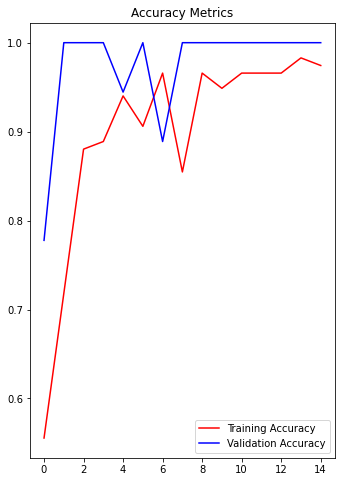

In [12]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, '-r', label='Training Accuracy')
plt.plot(epochs_range, val_acc, '-b', label='Validation Accuracy')
plt.title('Accuracy Metrics')
plt.legend(loc='lower right')

plt.show()

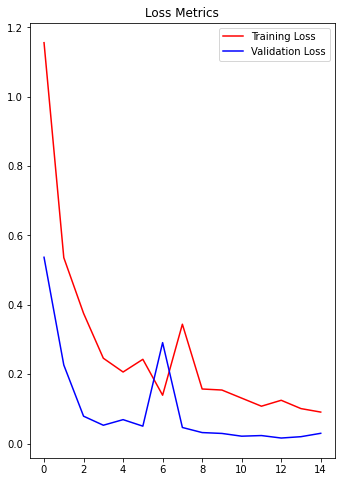

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, '-r', label='Training Loss')
plt.plot(epochs_range, val_loss, '-b', label='Validation Loss')
plt.title('Loss Metrics')
plt.legend()

plt.show()

### Prediction of COVID-19 Disease

In [14]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Since the input shape to the first CNN layer is (None, img_height, img_width, 3), we need to reshape the input array.
In the directory of 'train' inside 'covid19dataset', since 'covid' file comes before 'normal' file, we have positive indicated by number 0 and negative indicated by number 1.

The prediction value is between 0 and 1 because we only have two folders, 'covid' and 'name'. If the value is greater or equal to 0.5, then the value will be rounded to 1 and the prediction will be negative.

In [15]:
def predictionResultCompiler(image_path, times=0):
    Results = dict()
    j = 0
    for i in os.listdir(image_path):
        if j >= times:
            break
        image = load_img(image_path+'\\'+i, target_size=(img_height,img_width))
        image_data_input = img_to_array(image)
        image_data_input = image_data_input.reshape(-1,img_height,img_width,3)
        prediction = model.predict(image_data_input)
        Results[i] = '+' if np.round(prediction[0][0]) == 0 else '-' # 0 means positive, 1 means negative
        j+=1
    return Results

#### Positive Cases

In [16]:
def accuracy(data, total = 0, type = ''):
    accuracy = 0
    if(type == '-'):
        # Number of successful prediction for negative cases / Total
        if(data.index[0]) == '-':
            accuracy = data[0] / total
        else:
            accuracy = data[1] / total

    elif(type == '+'):
        # Number of successful prediction for negative cases / Total
        if(data.index[0]) == '+':
            accuracy = data[0] / total
        else:
            accuracy = data[1] / total

    return accuracy

In [17]:
# 100 images of positive cases
positivePredict = predictionResultCompiler(
    'Positive', 
    100) 

1/1 [==============================] - 0s 36ms/step


In [18]:
df = pd.DataFrame.from_dict(positivePredict, orient='index', columns=['Prediction'])
df

,Prediction
Positive (1).jpeg,+
Positive (10).jpeg,+
Positive (100).png,+
Positive (101).jpeg,+
Positive (101).jpg,+
...,...
Positive (90).png,+
Positive (91).png,+
Positive (92).png,-
Positive (93).png,+


In [19]:
print('Accuracy for positive cases:', accuracy(data=df['Prediction'].value_counts(), 
                                               total=len(df['Prediction']),
                                               type='+').round(3))

Accuracy for positive cases: 0.9


#### Negative Cases but with Pneumonia

To make the prediction more challenging, we will use images for pneumonia cases but COVID-19 negative.

In [20]:
# 100 images of negative cases but with pneumonia
negativePredict = predictionResultCompiler(
    'Pneumonia', 
    100) 

1/1 [==============================] - 0s 18ms/step


In [21]:
df = pd.DataFrame.from_dict(negativePredict, orient='index', columns=['Prediction'])
df

,Prediction
Pneumonia (1).jpeg,-
Pneumonia (10).jpeg,-
Pneumonia (100).jpeg,-
Pneumonia (101).jpeg,-
Pneumonia (102).jpeg,-
...,...
Pneumonia (83).jpeg,-
Pneumonia (84).jpeg,-
Pneumonia (85).jpeg,-
Pneumonia (86).jpeg,-


In [22]:
print('Accuracy for negative cases but with Pneumonia:', accuracy(data=df['Prediction'].value_counts(), 
                                                         total=len(df['Prediction']),
                                                         type='-').round(3))

Accuracy for negative cases but with Pneumonia: 0.92


#### Normal Cases

In [23]:
# 100 images of normal cases
normalPredict = predictionResultCompiler(
    'Normal', 
    100) 

1/1 [==============================] - 0s 31ms/step


In [24]:
df = pd.DataFrame.from_dict(normalPredict, orient='index', columns=['Prediction'])
df

,Prediction
Normal (1).jpeg,-
Normal (10).jpeg,-
Normal (100).jpeg,-
Normal (101).jpeg,-
Normal (102).jpeg,-
...,...
Normal (76).jpeg,-
Normal (77).jpeg,-
Normal (78).jpeg,-
Normal (79).jpeg,-


In [25]:
print('Accuracy for normal cases:', accuracy(data=df['Prediction'].value_counts(), 
                                             total=len(df['Prediction']),
                                             type='-').round(3))

Accuracy for normal cases: 0.93


Note: This model should not be used to diagnose COVID-19 disease fully. However, it can supplement existing tests for COVID-19 such as Polymerase-Chain Reaction (PCR) test which is far more accurate.

### Alternative Method for Image Input into the CNN

Besides using Keras image preprocessing library, we can also use cv2 library.

In [26]:
import cv2

In [27]:
def predictionResultCompiler(image_path, times=0):
    Results = dict()
    j = 0
    for i in os.listdir(image_path):
        if j >= times:
            break
        image = cv2.imread(image_path+'\\'+i)
        image_data_input = cv2.resize(image, (img_height,img_width))
        image_data_input = np.reshape(image_data_input, [1,img_height,img_width,3])
        prediction = model.predict(image_data_input)
        Results[i] = '+' if np.round(prediction[0][0]) == 0 else '-' # 0 means positive, 1 means negative
        j+=1
    return Results

In [28]:
# 100 images of negative cases but with pneumonia
Predict = predictionResultCompiler(
    'Pneumonia',
    100)

1/1 [==============================] - 0s 16ms/step


In [29]:
df = pd.DataFrame.from_dict(Predict, orient='index', columns=['Prediction'])
df

,Prediction
Pneumonia (1).jpeg,-
Pneumonia (10).jpeg,-
Pneumonia (100).jpeg,-
Pneumonia (101).jpeg,-
Pneumonia (102).jpeg,-
...,...
Pneumonia (83).jpeg,-
Pneumonia (84).jpeg,-
Pneumonia (85).jpeg,-
Pneumonia (86).jpeg,-


In [30]:
print('Accuracy for negative cases but with Pneumonia:', accuracy(data=df['Prediction'].value_counts(), 
                                                         total=len(df['Prediction']),
                                                         type='-').round(3))

Accuracy for negative cases but with Pneumonia: 0.91
